# Обучение без учителя

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 12)

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
RANDOM_STATE = 42

boston = load_boston()

feature_names = boston.feature_names

X = pd.DataFrame(boston.data, columns=feature_names)

y = boston.target

In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2, random_state=RANDOM_STATE)

In [10]:
len(X_test) / len(X), len(y_test) / len(y)

(0.2015810276679842, 0.2015810276679842)

In [11]:
scaler = StandardScaler()

In [12]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [14]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=RANDOM_STATE)

In [15]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [16]:
X_train_tsne[:2, :]

array([[28.13809  , 18.375324 ],
       [-9.785578 , -4.5355387]], dtype=float32)

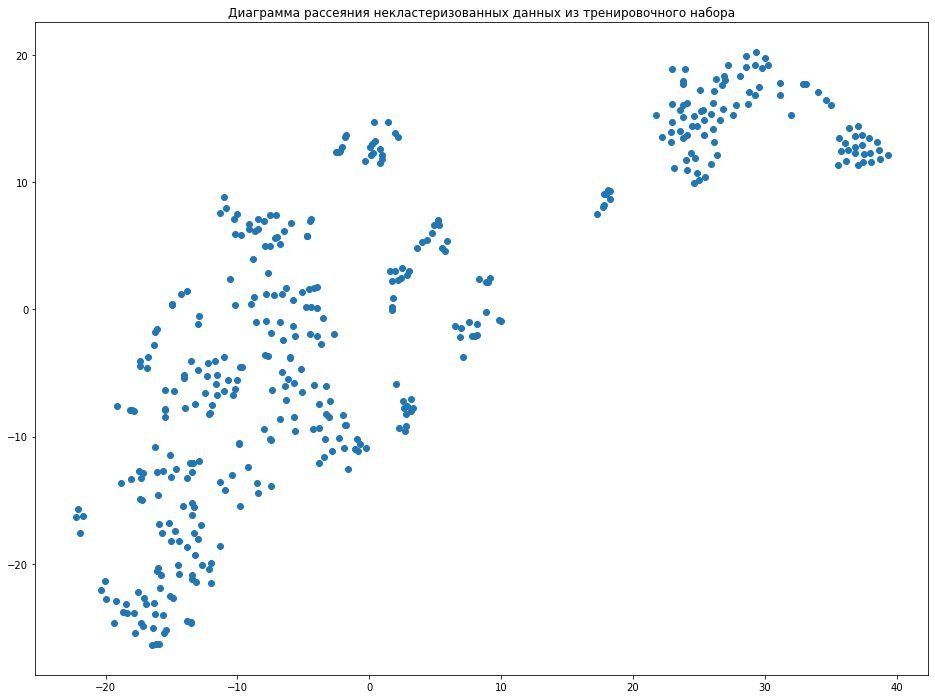

In [17]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title('Диаграмма рассеяния некластеризованных данных из тренировочного набора')
plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [18]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=RANDOM_STATE)

In [19]:
train_labels = kmeans.fit_predict(X_train_scaled)

In [20]:
pd.value_counts(train_labels)

0    191
1    127
2     86
dtype: int64

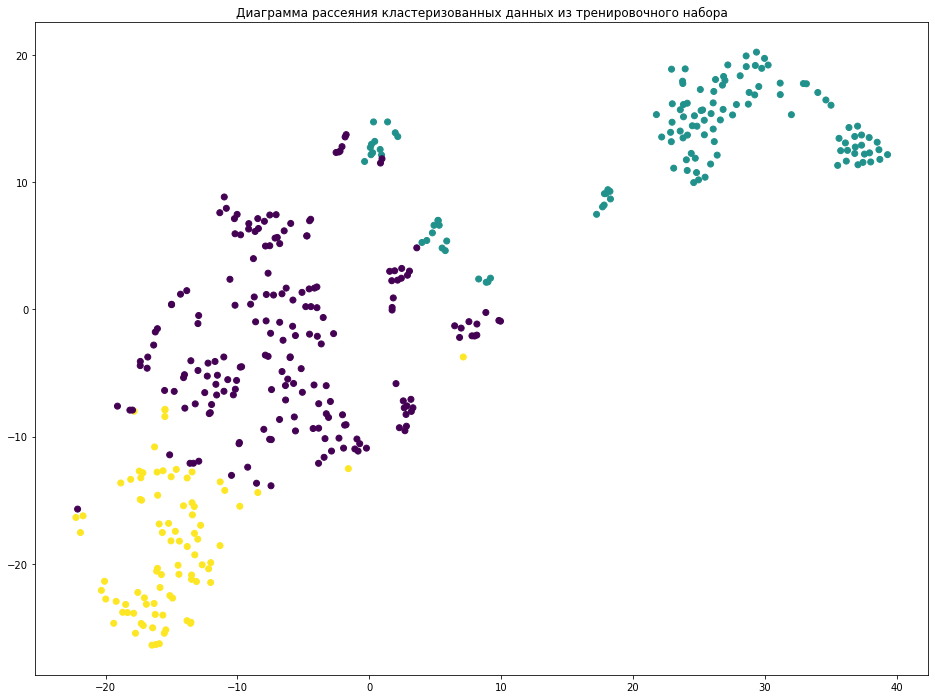

In [21]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.title('Диаграмма рассеяния кластеризованных данных из тренировочного набора')
plt.show()

In [22]:
print(f"Mean crime of cluster 0 (train): {X_train.loc[train_labels==0, 'CRIM'].mean()}\n")
print(f"Mean crime of cluster 1 (train): {X_train.loc[train_labels==1, 'CRIM'].mean()}\n")
print(f"Mean crime of cluster 2 (train): {X_train.loc[train_labels==2, 'CRIM'].mean()}\n")

Mean crime of cluster 0 (train): 0.42166020942408367

Mean crime of cluster 1 (train): 10.797028425196853

Mean crime of cluster 2 (train): 0.07356558139534886



In [23]:
print(f"Mean price of cluster 0 (train): {y_train[train_labels==0].mean()}\n")
print(f"Mean price of cluster 1 (train): {y_train[train_labels==1].mean()}\n")
print(f"Mean price of cluster 2 (train): {y_train[train_labels==2].mean()}\n")

Mean price of cluster 0 (train): 24.958115183246072

Mean price of cluster 1 (train): 16.165354330708663

Mean price of cluster 2 (train): 27.78837209302326



### Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [24]:
test_labels = kmeans.predict(X_test_scaled)
pd.value_counts(test_labels)

0    51
1    35
2    16
dtype: int64

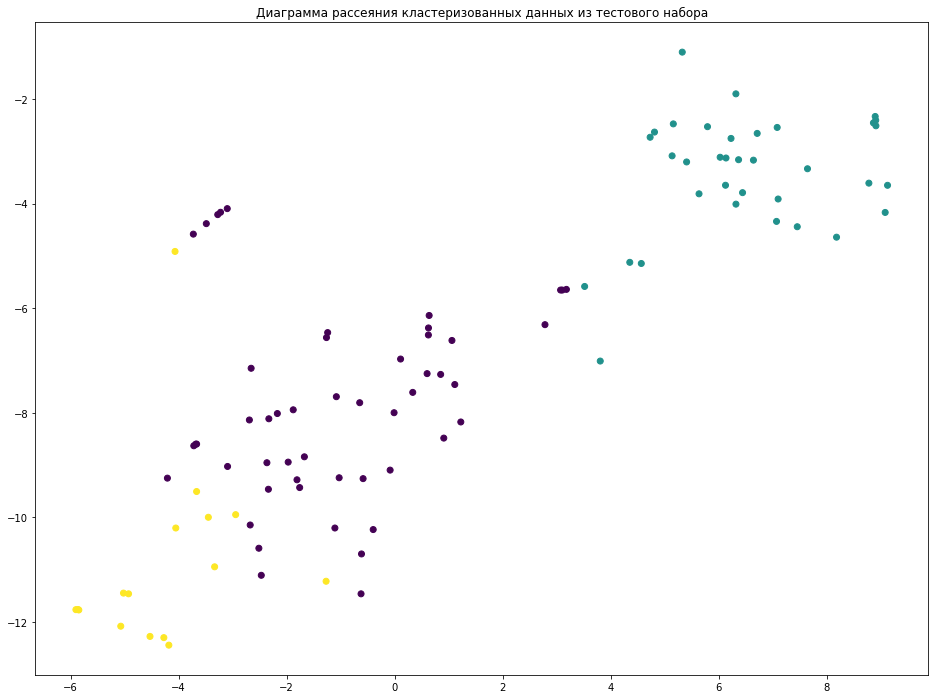

In [25]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels)
plt.title('Диаграмма рассеяния кластеризованных данных из тестового набора')
plt.show()

In [26]:
print(f"Mean crime of cluster 0 (test): {X_test.loc[test_labels==0, 'CRIM'].mean()}\n")
print(f"Mean crime of cluster 1 (test): {X_test.loc[test_labels==1, 'CRIM'].mean()}\n")
print(f"Mean crime of cluster 2 (test): {X_test.loc[test_labels==2, 'CRIM'].mean()}\n")

Mean crime of cluster 0 (test): 0.26607882352941176

Mean crime of cluster 1 (test): 10.165531142857143

Mean crime of cluster 2 (test): 0.062060000000000004



In [27]:
print(f"Mean price of cluster 0 (test): {y_test[test_labels==0].mean()}\n")
print(f"Mean price of cluster 1 (test): {y_test[test_labels==1].mean()}\n")
print(f"Mean price of cluster 2 (test): {y_test[test_labels==2].mean()}\n")

Mean price of cluster 0 (test): 21.860784313725492

Mean price of cluster 1 (test): 16.43714285714286

Mean price of cluster 2 (test): 31.35

